<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Important-Scripts" data-toc-modified-id="Important-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Important Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Log-transform-large-values" data-toc-modified-id="Log-transform-large-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Log transform large values</a></span></li><li><span><a href="#Train-Test-split-after-log-transform" data-toc-modified-id="Train-Test-split-after-log-transform-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train-Test split after log transform</a></span></li><li><span><a href="#Scaling-the-Data" data-toc-modified-id="Scaling-the-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Scaling the Data</a></span></li><li><span><a href="#GBR-Modelling" data-toc-modified-id="GBR-Modelling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>GBR Modelling</a></span></li><li><span><a href="#GBR-modelling-using-pipeline" data-toc-modified-id="GBR-modelling-using-pipeline-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>GBR modelling using pipeline</a></span></li><li><span><a href="#Cross-Validation-Results" data-toc-modified-id="Cross-Validation-Results-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Cross Validation Results</a></span></li><li><span><a href="#HPO-(Hyper-Parameters-Optimization)" data-toc-modified-id="HPO-(Hyper-Parameters-Optimization)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>HPO (Hyper Parameters Optimization)</a></span><ul class="toc-item"><li><span><a href="#Grid-Search-for-Gradient-Boosting-Regressor" data-toc-modified-id="Grid-Search-for-Gradient-Boosting-Regressor-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Grid Search for Gradient Boosting Regressor</a></span></li></ul></li><li><span><a href="#Hyper-Parameter-using-hyperopt-sklearn-for-Gradient-Boosting-Regressor" data-toc-modified-id="Hyper-Parameter-using-hyperopt-sklearn-for-Gradient-Boosting-Regressor-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Hyper Parameter using hyperopt-sklearn for Gradient Boosting Regressor</a></span></li><li><span><a href="#Scale-data-for-hyperparameter-tuning" data-toc-modified-id="Scale-data-for-hyperparameter-tuning-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Scale data for hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#HPO-without-scaling-the-data" data-toc-modified-id="HPO-without-scaling-the-data-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>HPO without scaling the data</a></span></li></ul></li></ul></div>

# Data Description

This dataset contains house sale prices for King County,
which includes Seattle.
It includes homes sold between May 2014 and May 2015.

- Dependent features: 1 (price)
- Features : 19 home features
- Id:  1 house ID

Task: Try to estimate the price based on given features.

![](https://github.com/bhishanpdl/Project_House_Price_Prediction/blob/master/data/raw/data_description.png?raw=1)

# Imports

In [0]:
import sys
IN_BHISHAN = 'bhishan' in sys.modules

if IN_BHISHAN:
    print('Environment: Personal environment')
    import src
    import bhishan
    %load_ext autoreload
    %autoreload 2

In [5]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    #!pip install hpsklearn

    # set OMP_NUM_THREADS=1 for hpsklearn package
    #!export OMP_NUM_THREADS=1
    print('Environment: Google Colab')

Environment: Google Colab


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time

# random state
RANDOM_STATE=100
np.random.seed(RANDOM_STATE) # we need this in each cell


# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 200)
# pd.set_option('display.float_format', '{:,.4f}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.17.4'), ('pandas', '0.25.3'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [7]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [8]:
import scipy
import sklearn

print([(x.__name__,x.__version__) for x in [scipy, sklearn]])

[('scipy', '1.3.2'), ('sklearn', '0.21.3')]


In [0]:
# scale and split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
# pipeline
from sklearn.pipeline import Pipeline

In [0]:
# classifier
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
# metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [0]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
df_eval = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

# Important Scripts

In [0]:
def show_method_attributes(obj, ncols=7,start=None, inside=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """

    print(f'Object Type: {type(obj)}\n')
    lst = [elem for elem in dir(obj) if elem[0]!='_' ]
    lst = [elem for elem in lst 
           if elem not in 'os np pd sys time psycopg2'.split() ]

    if isinstance(start,str):
        lst = [elem for elem in lst if elem.startswith(start)]
        
    if isinstance(start,tuple) or isinstance(start,list):
        lst = [elem for elem in lst for start_elem in start
               if elem.startswith(start_elem)]
        
    if isinstance(inside,str):
        lst = [elem for elem in lst if inside in elem]
        
    if isinstance(inside,tuple) or isinstance(inside,list):
        lst = [elem for elem in lst for inside_elem in inside
               if inside_elem in elem]

    return pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')

In [0]:
def adjustedR2(rsquared,nrows,kcols):
    return rsquared- (kcols-1)/(nrows-kcols) * (1-rsquared)

# Load the data

In [17]:
# df_clean = pd.read_csv('../data/processed/data_cleaned_encoded.csv')
df_clean = pd.read_csv('https://github.com/bhishanpdl/Project_House_Price_Prediction/blob/master/data/processed/data_cleaned_encoded.csv?raw=true')
print(df_clean.shape)
df_clean.head()

(21613, 92)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_top10,zipcode_houses,basement_bool,renovation_bool,age_cat,age_after_renovation_cat,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_1,grade_10,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,zipcode_top10_98004,zipcode_top10_98006,zipcode_top10_98033,zipcode_top10_98039,zipcode_top10_98040,zipcode_top10_98102,zipcode_top10_98105,zipcode_top10_98155,zipcode_top10_98177,zipcode_top10_others,age_cat_0,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_7,age_cat_8,age_cat_9,age_after_renovation_cat_0,age_after_renovation_cat_1,age_after_renovation_cat_2,age_after_renovation_cat_3,age_after_renovation_cat_4,age_after_renovation_cat_5,age_after_renovation_cat_6,age_after_renovation_cat_7,age_after_renovation_cat_8,age_after_renovation_cat_9,log1p_price,log1p_sqft_living,log1p_sqft_lot,log1p_sqft_above,log1p_sqft_basement,log1p_sqft_living15,log1p_sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,1955,59,others,262,0,0,5,5,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12.309987,7.074117,8.639588,7.074117,0.000000,7.201171,8.639588
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,1991,23,others,410,1,1,5,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13.195616,7.852050,8.887791,7.682943,5.993961,7.433075,8.941153
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,1933,82,others,283,0,0,7,7,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,12.100718,6.647688,9.210440,6.647688,0.000000,7.908755,8.995041
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,1965,49,others,263,1,0,4,4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13.311331,7.581210,8.517393,6.957497,6.814543,7.215975,8.517393
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,1987,28,others,441,0,0,2,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13.142168,7.427144,8.997271,7.427144,0.000000,7.496097,8.923191


In [18]:
# I will just take column names from this and will use cleaned data further.
# df_raw = pd.read_csv('../data/raw/kc_house_data.csv')
df_raw = pd.read_csv('https://github.com/bhishanpdl/Project_House_Price_Prediction/blob/master/data/raw/kc_house_data.csv?raw=true',nrows=1)
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
features_raw_all = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

df = df_clean[features_raw_all + ['price']]

# Log transform large values

In [20]:
log_cols = ['price','sqft_living','sqft_living15','sqft_lot','sqft_lot15']

for col in log_cols:
    df[col] = np.log1p(df[col].to_numpy())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Train-Test split after log transform

In [21]:
X = df[features_raw_all].to_numpy()

y = df['price'].to_numpy()

Xtrain, Xtest, ytrain, ytest = train_test_split (X,y,test_size=0.20,
                                                 random_state=RANDOM_STATE)

Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape, Xtrain[0][:2], Xtest[0][:2]

((17290, 18),
 (17290,),
 (4323, 18),
 (4323,),
 array([3.  , 1.75]),
 array([3. , 2.5]))

# Scaling the Data

In [22]:
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

Xtrain_scaled[0][:2], Xtest_scaled[0][:2]

(array([-0.39032991, -0.46881139]), array([-0.39032991,  0.50625765]))

# GBR Modelling

In [23]:
model = GradientBoostingRegressor()
model.fit(Xtrain_scaled,ytrain)

show_method_attributes(model)

Object Type: <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>



,0,1,2,3,4,5,6
0,alpha,get_params,max_depth,min_samples_leaf,n_estimators_,random_state,tol
1,apply,init,max_features,min_samples_split,n_features_,score,train_score_
2,criterion,init_,max_features_,min_weight_fraction_leaf,n_iter_no_change,set_params,validation_fraction
3,estimators_,learning_rate,max_leaf_nodes,n_classes_,predict,staged_predict,verbose
4,feature_importances_,loss,min_impurity_decrease,n_estimators,presort,subsample,warm_start
5,fit,loss_,min_impurity_split,,,,


Test RMSE: 0.18540888671808947
r_squared:  0.8773803471582997
adjustedr2:  0.8768961348241977


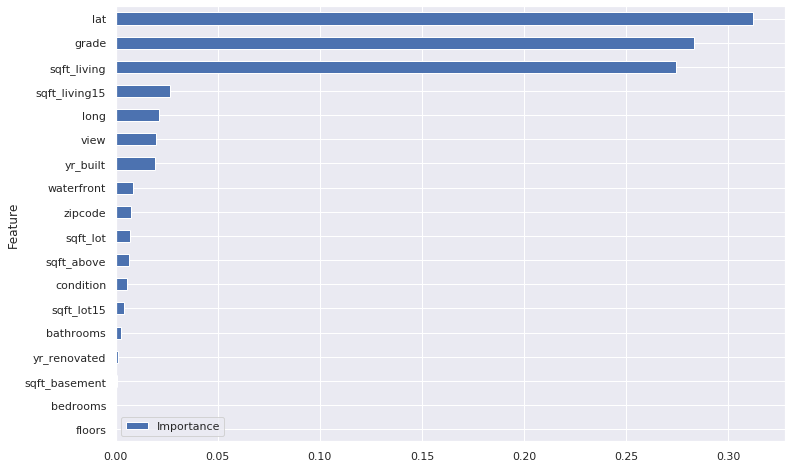

In [24]:
ypreds = model.predict(Xtest_scaled)

# rmse
rmse = np.sqrt(sklearn.metrics.mean_squared_error(ytest,ypreds))
print(f'Test RMSE: {rmse}')

# r-squared values
r2 = sklearn.metrics.r2_score(ytest, ypreds)
ar2 = adjustedR2(r2, Xtest_scaled.shape[0], Xtest_scaled.shape[1])
print('r_squared: ', r2)
print('adjustedr2: ', ar2)

# feature importance
df_imp = pd.DataFrame({'Feature': features_raw_all,
                       'Importance': model.feature_importances_
                       }) 
df_imp.sort_values('Importance').set_index('Feature').sort_values('Importance').plot.barh(figsize=(12,8))

# GBR modelling using pipeline

In [25]:
pipe = Pipeline([ ('Scaler', StandardScaler()),
                  ('GBR', GradientBoostingRegressor())
                ])

pipe.fit(Xtrain,ytrain)

# model evaluation
ypreds = pipe.predict(Xtest)

rmse = np.sqrt(sklearn.metrics.mean_squared_error(ytest,ypreds))
r2 = sklearn.metrics.r2_score(ytest, ypreds)
ar2 = adjustedR2(r2, Xtest.shape[0], Xtest.shape[1])

print(f'Test RMSE: {rmse}')
print(f'r_squared: {r2} ')
print(f'adjustedr2 = {ar2}')

# pipeline does not give feature importance.

Test RMSE: 0.1854261704833592
r_squared: 0.8773574849523254 
adjustedr2 = 0.8768731823377353


# Cross Validation Results

In [0]:
df_cv = pd.DataFrame({'Model': [],
                      '10-Fold Cross Validation Mean':[],
                      '10-Fold Cross Validation Std':[]
                     })

In [27]:
%%time
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=RANDOM_STATE)
cv_results = cross_val_score(model,Xtrain_scaled,ytrain,
                             cv=kfold,
                             scoring='neg_mean_squared_error'
                             )

df_cv.loc[0] = ['GBR', cv_results.mean(), cv_results.std() ]

display(df_cv)

# smallest rmse is best, largest negMSE is best.

,Model,10-Fold Cross Validation Mean,10-Fold Cross Validation Std
0,GBR,-0.034178,0.001451


CPU times: user 13.2 s, sys: 6.48 ms, total: 13.2 s
Wall time: 13.2 s


# HPO (Hyper Parameters Optimization)

## Grid Search for Gradient Boosting Regressor

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html 


Grid search is extremely slow. It need to fit the model for all the values in the
search space.

In [28]:
model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# n_estimators is 100 make it 1200
# there is no need to tune trees in forest always more is better.
# we can tune only just not to take too much trees for overfitting.

In [30]:
%%time
model = GradientBoostingRegressor(alpha=0.9,
                                  criterion='friedman_mse',
                                  init=None,
                                  learning_rate=0.1,
                                  loss='ls',
                                  max_depth=3,
                                  max_features=None,
                                  max_leaf_nodes=None,
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  min_weight_fraction_leaf=0.0,
                                  n_estimators=1200,
                                  n_iter_no_change=None,
                                  presort='auto',
                                  random_state=RANDOM_STATE,
                                  subsample=1.0,
                                  tol=0.0001,
                                  validation_fraction=0.1,
                                  verbose=0,
                                  warm_start=False)

model.fit(Xtrain_scaled,ytrain)

# model evaluation
ypreds = model.predict(Xtest_scaled)

rmse = np.sqrt(sklearn.metrics.mean_squared_error(ytest,ypreds))
r2 = sklearn.metrics.r2_score(ytest, ypreds)
ar2 = adjustedR2(r2, Xtest.shape[0], Xtest.shape[1])

print(f'Test RMSE: {rmse}')
print(f'r_squared: {r2} ')
print(f'adjustedr2 = {ar2}')

Test RMSE: 0.16013998674273916
r_squared: 0.9085258113198424 
adjustedr2 = 0.9081645892042646
CPU times: user 16.8 s, sys: 7.21 ms, total: 16.8 s
Wall time: 16.8 s


In [0]:
%%time
# tuning learning rates

from sklearn.model_selection import GridSearchCV

param_grid = dict(learning_rate= np.geomspace(0.05,0.5,10))

model = GradientBoostingRegressor(n_estimators=1200,
                                  verbose=1,
                                  random_state=RANDOM_STATE
                                 )


kfold = KFold(n_splits=5, random_state=RANDOM_STATE)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    scoring='neg_mean_squared_error',
                    cv=kfold)

# grid_result = grid.fit(Xtrain_scaled, ytrain)
# comment this after use.

      Iter       Train Loss   Remaining Time 
         1           0.2471           22.18s
         2           0.2218           21.76s
         3           0.2004           21.32s
         4           0.1817           21.55s
         5           0.1657           21.62s
         6           0.1521           21.46s
         7           0.1399           21.53s
         8           0.1295           21.41s
         9           0.1205           21.38s
        10           0.1123           21.44s
        20           0.0682           21.30s
        30           0.0525           20.45s
        40           0.0448           20.42s
        50           0.0406           20.47s
        60           0.0378           20.10s
        70           0.0361           19.22s
        80           0.0349           18.54s
        90           0.0339           17.96s
       100           0.0331           17.49s
       200           0.0279           14.88s
       300           0.0256           13.06s
       40

In [0]:
# show_method_attributes(grid_result)

In [0]:
# grid_result.best_params_
# {'learning_rate': 0.08340502686000295}

In [0]:
# learning_rate_best = grid_result.best_params_['learning_rate']

learning_rate_best = 0.08340502686000295

In [35]:
%%time
# tuning max_depth

from sklearn.model_selection import GridSearchCV

param_grid = dict(max_depth= np.arange(2,10))

model = GradientBoostingRegressor(n_estimators=1200,
                                  learning_rate = learning_rate_best,
                                  verbose=1,
                                  random_state=RANDOM_STATE
                                 )

kfold = KFold(n_splits=5, random_state=RANDOM_STATE)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    scoring='neg_mean_squared_error',
                    cv=kfold)

grid_result = grid.fit(Xtrain_scaled, ytrain)

      Iter       Train Loss   Remaining Time 
         1           0.2471           20.70s
         2           0.2218           20.99s
         3           0.2004           20.68s
         4           0.1817           21.01s
         5           0.1657           21.03s
         6           0.1521           20.85s
         7           0.1399           20.97s
         8           0.1295           20.84s
         9           0.1205           20.85s
        10           0.1123           20.94s
        20           0.0682           20.69s
        30           0.0525           20.02s
        40           0.0448           19.37s
        50           0.0406           18.80s
        60           0.0378           18.39s
        70           0.0361           17.71s
        80           0.0349           17.24s
        90           0.0339           16.92s
       100           0.0331           16.55s
       200           0.0279           14.29s
       300           0.0256           12.75s
       40

In [36]:
grid_result.best_params_

{'max_depth': 3}

In [37]:
max_depth_best = grid_result.best_params_['max_depth']
max_depth_best

3

In [38]:
%%time
# tuning min_samples_split

# minimum number of samples required to split an internal node

from sklearn.model_selection import GridSearchCV

param_grid = dict(min_samples_split= np.linspace(0.1, 1.0, 10, endpoint=True))

model = GradientBoostingRegressor(n_estimators=1200,
                                  learning_rate=learning_rate_best,
                                  max_depth=max_depth_best,
                                  verbose=1,
                                  random_state=RANDOM_STATE
                                 )


kfold = KFold(n_splits=5, random_state=RANDOM_STATE)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    scoring='neg_mean_squared_error',
                    cv=kfold)

grid_result = grid.fit(Xtrain_scaled, ytrain)

      Iter       Train Loss   Remaining Time 
         1           0.2474           20.57s
         2           0.2224           20.44s
         3           0.2012           20.21s
         4           0.1826           20.69s
         5           0.1671           20.46s
         6           0.1534           20.37s
         7           0.1415           20.44s
         8           0.1313           20.26s
         9           0.1219           20.37s
        10           0.1140           20.50s
        20           0.0703           20.15s
        30           0.0550           18.98s
        40           0.0473           18.16s
        50           0.0428           17.47s
        60           0.0399           16.99s
        70           0.0378           16.49s
        80           0.0364           15.96s
        90           0.0356           15.43s
       100           0.0349           15.06s
       200           0.0305           12.86s
       300           0.0280           11.77s
       40

In [39]:
grid_result.best_params_

{'min_samples_split': 0.1}

In [40]:
min_samples_split_best = grid_result.best_params_['min_samples_split']
min_samples_split_best

0.1

In [41]:
%%time
# tuning min_samples_leaf

# The minimum number of samples required to be at a leaf node.

from sklearn.model_selection import GridSearchCV

param_grid = dict(min_samples_leaf= np.linspace(0.1, 0.5, 5, endpoint=True))

model = GradientBoostingRegressor(n_estimators=1200,
                                  learning_rate = learning_rate_best,
                                  max_depth = max_depth_best,
                                  min_samples_split = min_samples_split_best,
                                  verbose=1,
                                  random_state=RANDOM_STATE
                                 )


kfold = KFold(n_splits=5, random_state=RANDOM_STATE)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    scoring='neg_mean_squared_error',
                    cv=kfold)

grid_result = grid.fit(Xtrain_scaled, ytrain)

      Iter       Train Loss   Remaining Time 
         1           0.2501           15.88s
         2           0.2268           16.49s
         3           0.2075           16.07s
         4           0.1900           16.25s
         5           0.1759           15.97s
         6           0.1610           16.50s
         7           0.1498           16.53s
         8           0.1387           16.91s
         9           0.1308           16.72s
        10           0.1221           16.93s
        20           0.0806           16.93s
        30           0.0655           16.02s
        40           0.0578           15.71s
        50           0.0537           15.34s
        60           0.0507           14.95s
        70           0.0492           14.45s
        80           0.0477           14.17s
        90           0.0466           13.94s
       100           0.0458           13.71s
       200           0.0412           12.20s
       300           0.0386           11.10s
       40

In [42]:
grid_result.best_params_

{'min_samples_leaf': 0.1}

In [43]:
min_samples_leaf_best = grid_result.best_params_['min_samples_leaf']
min_samples_leaf_best

0.1

In [44]:
%%time
# tuning max_features

# Number of columns to be used

from sklearn.model_selection import GridSearchCV

param_grid = dict(max_features= np.arange(5,Xtrain.shape[1]))

model = GradientBoostingRegressor(n_estimators=1200,
                                  learning_rate = learning_rate_best,
                                  max_depth = max_depth_best,
                                  min_samples_split = min_samples_split_best,
                                  min_samples_leaf = min_samples_leaf_best,
                                  verbose=1,
                                  random_state=RANDOM_STATE
                                 )


kfold = KFold(n_splits=5, random_state=RANDOM_STATE)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    scoring='neg_mean_squared_error',
                    cv=kfold)

grid_result = grid.fit(Xtrain_scaled, ytrain)

      Iter       Train Loss   Remaining Time 
         1           0.2501           13.78s
         2           0.2284           13.42s
         3           0.2091           13.62s
         4           0.1916           13.72s
         5           0.1762           13.91s
         6           0.1635           13.77s
         7           0.1506           14.14s
         8           0.1397           14.39s
         9           0.1307           14.46s
        10           0.1232           14.40s
        20           0.0811           14.19s
        30           0.0658           13.59s
        40           0.0583           13.16s
        50           0.0538           12.84s
        60           0.0513           12.55s
        70           0.0493           12.21s
        80           0.0478           11.94s
        90           0.0467           11.86s
       100           0.0458           11.66s
       200           0.0409           10.42s
       300           0.0386            9.38s
       40

In [45]:
grid_result.best_params_

{'max_features': 15}

In [46]:
max_features_best = grid_result.best_params_['max_features']
max_features_best

15

## Best Model

In [48]:
%%time
model = model = GradientBoostingRegressor(n_estimators=1200,
                                  learning_rate = learning_rate_best,
                                  max_depth = max_depth_best,
                                  min_samples_split = min_samples_split_best,
                                  min_samples_leaf = min_samples_leaf_best,
                                  max_features = max_features_best,
                                  verbose=1,
                                  random_state=RANDOM_STATE
                                 )

model.fit(Xtrain_scaled,ytrain)

# model evaluation
ypreds = model.predict(Xtest_scaled)

rmse = np.sqrt(sklearn.metrics.mean_squared_error(ytest,ypreds))
r2 = sklearn.metrics.r2_score(ytest, ypreds)
ar2 = adjustedR2(r2, Xtest.shape[0], Xtest.shape[1])

print(f'Test RMSE: {rmse}')
print(f'r_squared: {r2} ')
print(f'adjustedr2 = {ar2}')

      Iter       Train Loss   Remaining Time 
         1           0.2501           13.70s
         2           0.2284           13.31s
         3           0.2091           13.75s
         4           0.1916           14.57s
         5           0.1762           14.65s
         6           0.1635           14.45s
         7           0.1506           14.77s
         8           0.1397           15.08s
         9           0.1307           15.19s
        10           0.1232           15.13s
        20           0.0811           14.68s
        30           0.0658           14.00s
        40           0.0583           13.48s
        50           0.0538           13.05s
        60           0.0513           12.67s
        70           0.0493           12.40s
        80           0.0478           12.05s
        90           0.0467           11.86s
       100           0.0458           11.59s
       200           0.0409           10.41s
       300           0.0386            9.38s
       40

In [0]:
# I did a sequential grid search, I need to do all grid search at same time.
# Also, it takes long time to fit grid search.
# The baseline model gave me 0.9 but after grid search it gave me 0.87.
# The grid search space needs to be increased.